# Analyzing CIA  Factbook Data

The CIA World Factbook is a resource produces by the US Central Intelligence Agency providing information about over 250 countries of the world. The CIA World Factbook's websites contains information about maps, flags, country profiles, and demographic data. The data set we will be working with in this project can be found [here](https://github.com/factbook/factbook.sql/releases). The data set includes the following columns:
1. **id**: id for the country
2. **code**: abbreviated code (two characters) of the country (unique)
3. **name**: name of the country
4. **area**: area (geograhical size) of the country in km2; cumulative of **area_land** and **area_water**
5. **area_land**: land area (geograhical size) of the country in km2
6. **water_area**: water area (geograhical size) of the country in km2
7. **population**: the country's population
8. **population_growth**: the percentage of population growth in one year
9. **birth_rate**: the country's total number of births per 1,000 population in one year
10. **death_rate**: the total number of deaths per 1,000 population of the country in one year
11. **migration_rate**: ratio between the number of immigrants and the number of emigrants
12. **created_at**: date of the rows creations
13. **updated_at**: date of the rows last update
<br><br>
The data set's type is SQLite and contains each country's information as of 2015.

### Goals of this project

The goal of this project is to find interesting demographic facts about the world, for example the country with the lowest population density or the country with the highest ration of water area to land area. In addition, we want to visualize the data to get a better understanding of the disribution of different variables.

## Setting up the data set

In [38]:
# Connecting SQLite database
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

# Generating database information
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


The database stores a table named 'facts' containing all the relevant information for this project.

In [39]:
# Generation table information
q1 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Summary statistics

Let's first get some statistical summaries about this data set. The statistical summaries we are first interested are:
- The minimum population
- The maximum population
- The minimum population growth
- The maximum population growth

In [41]:
q3 = "SELECT MIN(population) min_population, MAX(population) max_population, MIN(population_growth) min_pop_growth, MAX(population_growth) max_pop_growth FROM FACTS"
pd.read_sql_query(q3, conn)

,min_population,max_population,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


We can see multiple interesting results. First, the minimum population is zero, which is unexpected since we would assume that a country's characteristics is to have citizens. Second, the maximum population is around 7.26 billion. Having some basic geographical knowledge, we know that this number is not the number of the country with the world's highest population, but rather the world's total population. The minimum population growth is 0.0 and the maximum population growth is 4.02. <br>
From these query results, we can assume that not all rows of the data set contain information about a country. Instead some rows could include other geographical data, for instance for the entire world.

### Exploring outliers

In [43]:
q4 = "SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts)"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


Like assumed earlier, the maximum value for the population column can be assigned to the world population.

In [45]:
q5 = "SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts)"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


The minimum value for the population belongs to Antarctica. Since it is an region with drastic climate conditions it has a total population of 0.

## Statistical analysis continued

In [54]:
q6 = "SELECT * FROM facts WHERE birth_rate == (SELECT MAX(birth_rate) FROM facts)"
pd.read_sql_query(q6, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,128,ng,Niger,None,1266700,300,18045729,3.25,45.45,12.42,0.56,2015-11-01 13:30:34.606095,2015-11-01 13:30:34.606095


In [53]:
q7 = "SELECT * FROM facts WHERE death_rate == (SELECT MAX(death_rate) FROM facts)"
pd.read_sql_query(q7, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,98,lt,Lesotho,30355,30355,0,1947701,0.32,25.47,14.89,7.36,2015-11-01 13:28:12.551085,2015-11-01 13:28:12.551085


In [58]:
q8 = "SELECT * FROM facts WHERE death_rate == (SELECT MIN(death_rate) FROM facts)"
pd.read_sql_query(q8, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,141,qa,Qatar,11586,11586,0,2194817,3.07,9.84,1.53,22.39,2015-11-01 13:31:38.827541,2015-11-01 13:31:38.827541


In [60]:
q9 = "SELECT * FROM facts WHERE birth_rate == (SELECT MIN(birth_rate) FROM facts)"
pd.read_sql_query(q9, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,117,mn,Monaco,2,2,0,30535,0.12,6.65,9.24,3.83,2015-11-01 13:29:41.926640,2015-11-01 13:29:41.926640


In [62]:
q10 = "SELECT * FROM facts WHERE population_growth == (SELECT MIN(population_growth) FROM facts)"
pd.read_sql_query(q10, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,190,vt,Holy See (Vatican City),0,0,0.0,842,0.0,NaN,NaN,NaN,2015-11-01 13:35:32.774433,2015-11-01 13:35:32.774433
1,200,ck,Cocos (Keeling) Islands,14,14,0.0,596,0.0,NaN,NaN,NaN,2015-11-01 13:36:12.949429,2015-11-01 13:36:12.949429
2,207,gl,Greenland,2166086,2166086,NaN,57733,0.0,14.48,8.49,5.98,2015-11-01 13:36:35.145214,2015-11-01 13:36:35.145214
3,238,pc,Pitcairn Islands,47,47,0.0,48,0.0,NaN,NaN,NaN,2015-11-01 13:38:08.047849,2015-11-01 13:38:08.047849


In [63]:
q11 = "SELECT * FROM facts WHERE population_growth == (SELECT MAX(population_growth) FROM facts)"
pd.read_sql_query(q11, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,162,od,South Sudan,644329,None,None,12042910,4.02,36.91,8.18,11.47,2015-11-01 13:33:16.279312,2015-11-01 13:33:16.279312


From the queries above we can tell that:
- Niger has the highest birth rate 
- Lesotho has the highest death rate
- Qatar has the lowest death rate
- Monaco has the lowest birth rate
- South Sudan has the highest population growth

## Histograms

Now that we have the minimum and maximum values for the birth rate, death rate, population growth, and population, it will be interested to see how the values for each characteristics are distributed in the data set. This can be achieved by using histograms. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1930eba8>,
      dtype=object)

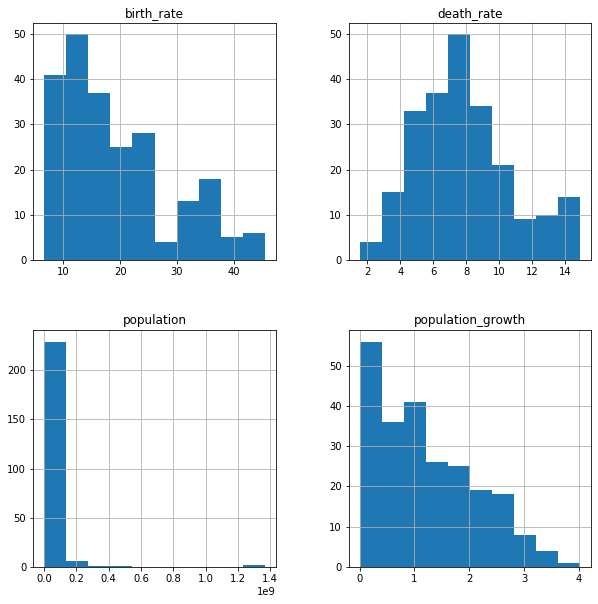

In [70]:
# Creating histograms; excluding outliers by using the between condition
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q12 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population BETWEEN 100 AND 3000000000"
pd.read_sql_query(q12, conn).hist(ax=ax)

The histograms give additional insights into the data set. First, most of the values in the birth rate histogram are below 25 and the histogram is right skewed. The death rate is a mix of the normal distribution and left skewed. The population growth data is right skewed and most values are below two percent. The population histogram shows that an underwhelmingly big majority of a country's population is below 300 million. In order to create a more meaningful histogram for the population we can change the range to show countries below a 100 million citizen.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a1976a0>],
      dtype=object)

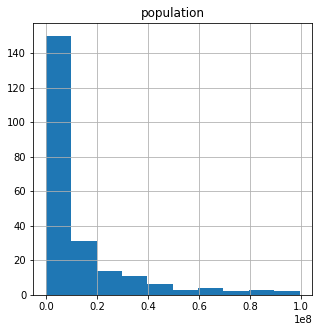

In [78]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

q12 = "SELECT population FROM facts WHERE population BETWEEN 100 AND 100000000"
pd.read_sql_query(q12, conn).hist(ax=ax)

## Statistical Analysis continued

Next, we are interested to see the countries with the highest population density. The population density of a country is measured by dividing the countries are from the countries population.

In [81]:
q13 = "SELECT name AS country, CAST(population as float)/CAST(area as float) AS density, area FROM facts ORDER BY density desc LIMIT 10"
pd.read_sql_query(q13, conn)

,country,density,area
0,Macau,21168.964286,28
1,Monaco,15267.500000,2
2,Singapore,8141.279770,697
3,Hong Kong,6445.041516,1108
4,Gaza Strip,5191.819444,360
5,Gibraltar,4876.333333,6
6,Bahrain,1771.859211,760
7,Maldives,1319.640940,298
8,Malta,1310.015823,316
9,Bermuda,1299.925926,54


Macau, Monaco, and Singapore are the countries with the highest population density. What stands out is the fact that the size of each country is very small, which leads to the high densities. If we want to see the countries with the highest density that are bigger than 10.000
km2 we have to change the SQL query.

In [85]:
q14 = "SELECT name AS country, CAST(population as float)/CAST(area as float) AS density, area FROM facts WHERE area >= 10000 ORDER BY density desc LIMIT 10"
pd.read_sql_query(q14, conn)

,country,density,area
0,Bangladesh,1138.069143,148460
1,Taiwan,650.781712,35980
2,Lebanon,594.682788,10400
3,"Korea, South",492.531047,99720
4,Rwanda,480.740109,26338
5,Netherlands,407.960523,41543
6,Israel,387.545209,20770
7,Burundi,385.996263,27830
8,India,380.771354,3287263
9,Belgium,370.937271,30528


We can see that Bangladesh, Taiwan, and Lebanon are the countries with the highest population density that have an area over 10.000 km2. Next, let's analyze what country has the lowest population density.

In [89]:
q15 = "SELECT name AS country, CAST(population as float)/CAST(area as float) AS density, area, population FROM facts WHERE density > 0 ORDER BY density asc LIMIT 10"
pd.read_sql_query(q15, conn)

,country,density,area,population
0,Greenland,0.026653,2166086,57733
1,Svalbard,0.030172,62045,1872
2,Falkland Islands (Islas Malvinas),0.276103,12173,3361
3,Pitcairn Islands,1.021277,47,48
4,Mongolia,1.913482,1564116,2992908
5,Western Sahara,2.146113,266000,570866
6,Namibia,2.683888,824292,2212307
7,Australia,2.938944,7741220,22751014
8,Iceland,3.222505,103000,331918
9,Guyana,3.420130,214969,735222


Greenland, Svalbard, and Falkland Islands have the lowest population densities and are sparely populated. It will be more interesting to generate the countries with the lowest population density that have over 1 million citizen.

In [108]:
q16 = "SELECT name AS country, CAST(population as float)/CAST(area as float) AS density, area, population FROM facts WHERE population > 1000000 AND density > 0 ORDER BY density asc LIMIT 10"
pd.read_sql_query(q16, conn)

,country,density,area,population
0,Mongolia,1.913482,1564116,2992908
1,Namibia,2.683888,824292,2212307
2,Australia,2.938944,7741220,22751014
3,Mauritania,3.489572,1030700,3596702
4,Canada,3.515373,9984670,35099836
5,Libya,3.644007,1759540,6411776
6,Botswana,3.752117,581730,2182719
7,Gabon,6.371110,267667,1705336
8,Kazakhstan,6.663409,2724900,18157122
9,Russia,8.329732,17098242,142423773


As we can see from the results of the query, Mongolia, Namibia, and Australia have the lowest population density from all countries that have a population higher than 1 million. Next, let's try to generate the histogram for the population density.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b9bfef0>],
      dtype=object)

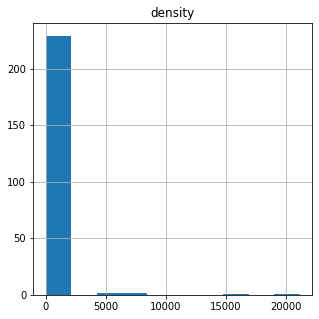

In [109]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

q17 = "SELECT CAST(population as float)/CAST(area as float) AS density FROM facts WHERE population BETWEEN 100 AND 3000000000"
pd.read_sql_query(q17, conn).hist(ax=ax)

The histogram shows that a vast majority of the density values are between 0 and 2000. We can make the histogram more granular by changing the range to 0 to 2000.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b865cc0>],
      dtype=object)

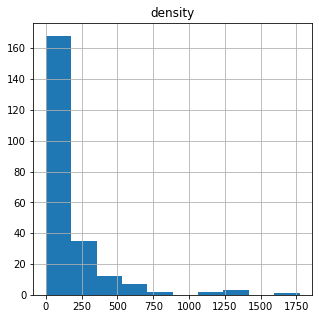

In [110]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

q18 = "SELECT CAST(population as float)/CAST(area as float) AS density FROM facts WHERE density BETWEEN 0 AND 2000"
pd.read_sql_query(q18, conn).hist(ax=ax)

Changing the range of the density values still produces a right skewed distribution and shows that most countries have a density below 200 people/km2.

One last interesting characteristic of a country is the proportion from the area of land and water. Let's try to find out what country has the highest percentage of water area.

In [111]:
q19 = "SELECT name AS country, population, area_water, area_land, CAST(area_water AS float)/CAST(area AS float) *100 AS water_percentage FROM facts WHERE population > 0 ORDER BY water_percentage desc LIMIT 10"
pd.read_sql_query(q19, conn)

,country,population,area_water,area_land,water_percentage
0,Virgin Islands,103574,1564,346,81.884817
1,Puerto Rico,3598357,4921,8870,35.682692
2,"Bahamas, The",324597,3870,10010,27.881844
3,Guinea-Bissau,1726170,8005,28120,22.159170
4,Malawi,17964697,24404,94080,20.596874
5,Netherlands,16947904,7650,33893,18.414655
6,Uganda,37101745,43938,197100,18.228661
7,Eritrea,6527689,16600,101000,14.115646
8,Liberia,4195666,15049,96320,13.512737
9,Bangladesh,168957745,18290,130170,12.319817


The Virgin Islands are the country with the highest percentage of water area. Over 80% of the country's area is covered by water.

## Conclusion

In this project we did some analyzes regarding the demographical characteristics of different countries. We found the extreme values for multiple columns and visualized the distribution of data via histograms. Going forward, it would be interesting to analyze characteristics like population growth, population density, and death rate by continent. A continent column will have to be added first in order to do this analysis. 